<a href="https://colab.research.google.com/github/BioSCape-io/campaign_planning/blob/main/bioscape_flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install git+https://github.com/geospace-code/pymap3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/geospace-code/pymap3d to /tmp/pip-req-build-8tb2qwmf
  Running command git clone --filter=blob:none --quiet https://github.com/geospace-code/pymap3d /tmp/pip-req-build-8tb2qwmf
  Resolved https://github.com/geospace-code/pymap3d to commit 6a844662e49bfbd5c8e02c31ebaec0ca722126d2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import sys


import numpy as np
import matplotlib.pyplot as plt
import pymap3d.vincenty

import Aircraft
import Flightline
import Airport
import Spectrometer
import Units

import importlib
importlib.reload(Aircraft)
importlib.reload(Flightline)
importlib.reload(Airport)
importlib.reload(Spectrometer)
importlib.reload(Units)



ModuleNotFoundError: ignored

In [ ]:
prism = Spectrometer.PRISM()
hytes = Spectrometer.HyTES()
aviris = Spectrometer.AVIRISNextGen()

LaRC_G3 = Aircraft.LaRCGulfstreamIII()
airport = Airport.Airport('FACT')


In [ ]:
# calculate for the altitude needed for AVIRIS-NG to have 5m pixels at nadir
aviris.altForPixelSizeNadir(5)

4999.997795512981

In [ ]:
# calculate the critical ground speed in knots for a specified along-track oversampling rate
Units.mps2kts(aviris.criticalGroundSpeed(5000, 2))


485.96133675909175

In [ ]:
# calculate the critical ground speed in knots for a specified along-track oversampling rate
Units.mps2kts(prism.criticalGroundSpeed(5000, 3))

502.902746071807

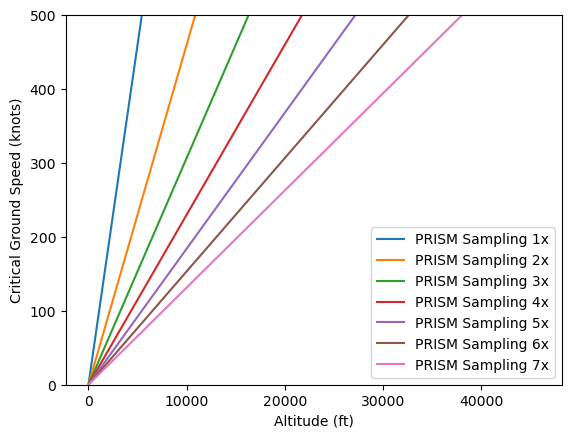

In [ ]:
altitudes = np.arange(0,15000,1000)
prism.criticalGroundSpeed(altitudes)
plt.plot(Units.m2ft(altitudes), Units.mps2kts(prism.criticalGroundSpeed(altitudes, 1)),label = "PRISM Sampling 1x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(prism.criticalGroundSpeed(altitudes, 2)),label = "PRISM Sampling 2x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(prism.criticalGroundSpeed(altitudes, 3)),label = "PRISM Sampling 3x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(prism.criticalGroundSpeed(altitudes, 4)),label = "PRISM Sampling 4x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(prism.criticalGroundSpeed(altitudes, 5)),label = "PRISM Sampling 5x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(prism.criticalGroundSpeed(altitudes, 6)),label = "PRISM Sampling 6x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(prism.criticalGroundSpeed(altitudes, 7)),label = "PRISM Sampling 7x")
plt.ylim(0, 500)
plt.xlabel('Altitude (ft)')
plt.ylabel('Critical Ground Speed (knots)')
plt.legend()
plt.show()

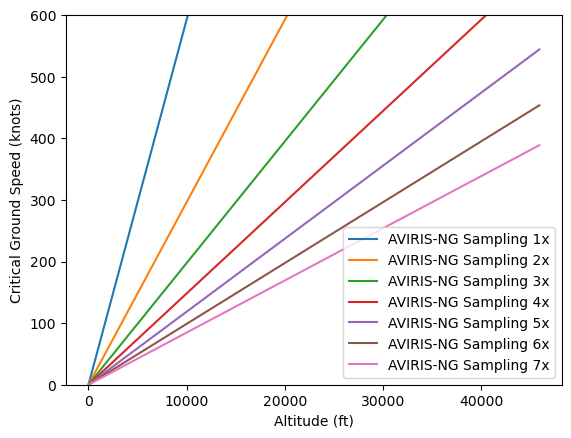

In [ ]:
altitudes = np.arange(0,15000,1000)
aviris.criticalGroundSpeed(altitudes)
plt.plot(Units.m2ft(altitudes), Units.mps2kts(aviris.criticalGroundSpeed(altitudes, 1)),label = "AVIRIS-NG Sampling 1x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(aviris.criticalGroundSpeed(altitudes, 2)),label = "AVIRIS-NG Sampling 2x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(aviris.criticalGroundSpeed(altitudes, 3)),label = "AVIRIS-NG Sampling 3x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(aviris.criticalGroundSpeed(altitudes, 4)),label = "AVIRIS-NG Sampling 4x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(aviris.criticalGroundSpeed(altitudes, 5)),label = "AVIRIS-NG Sampling 5x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(aviris.criticalGroundSpeed(altitudes, 6)),label = "AVIRIS-NG Sampling 6x")
plt.plot(Units.m2ft(altitudes), Units.mps2kts(aviris.criticalGroundSpeed(altitudes, 7)),label = "AVIRIS-NG Sampling 7x")
plt.ylim(0, 600)
plt.xlabel('Altitude (ft)')
plt.ylabel('Critical Ground Speed (knots)')
plt.legend()
plt.show()

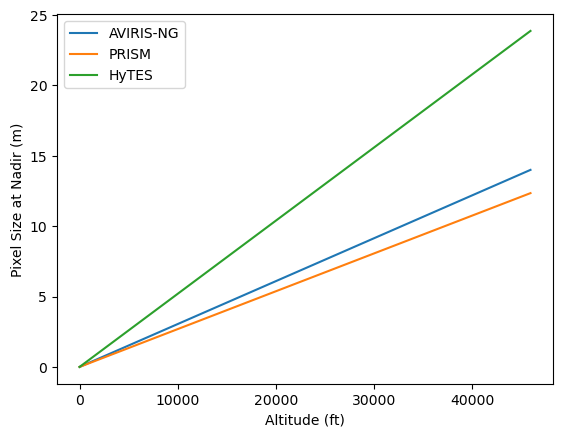

In [ ]:
altitudes = np.arange(0,15000,1000)
plt.plot(Units.m2ft(altitudes), aviris.pixelSizeAtNadir(altitudes),label = "AVIRIS-NG")
plt.plot(Units.m2ft(altitudes), prism.pixelSizeAtNadir(altitudes),label = "PRISM")
plt.plot(Units.m2ft(altitudes), hytes.pixelSizeAtNadir(altitudes),label = "HyTES")

plt.xlabel('Altitude (ft)')
plt.ylabel('Pixel Size at Nadir (m)')
plt.legend()
plt.show()

In [ ]:
# calculate the altitude (AGL m) needed for specified pixel size at nadir
aviris.altForPixelSizeNadir(5)

4999.997795512981

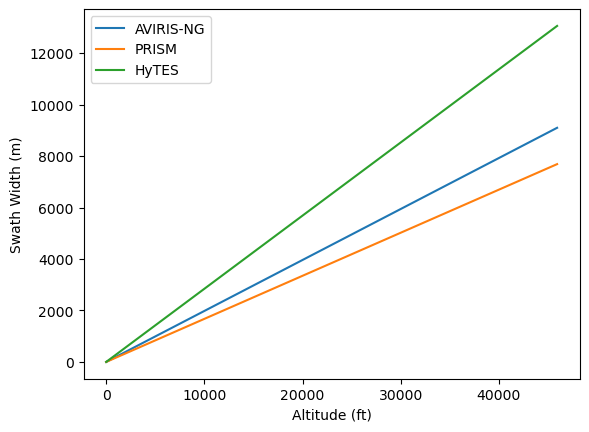

In [ ]:
altitudes = np.arange(0,15000,1000)
plt.plot(Units.m2ft(altitudes), aviris.swathWidthAt(altitudes),label = "AVIRIS-NG")
plt.plot(Units.m2ft(altitudes), prism.swathWidthAt(altitudes),label = "PRISM")
plt.plot(Units.m2ft(altitudes), hytes.swathWidthAt(altitudes),label = "HyTES")

plt.xlabel('Altitude (ft)')
plt.ylabel('Swath Width (m)')
plt.legend()
plt.show()

In [ ]:
import Sun
import datetime
import pandas as pd

# set the longitude and latitude to the center of the desired box
lon = 18.75318179539759
lat = -34.39969883641197

# define the desired date range
dates = pd.date_range(start="2023-10-01",end="2023-12-15") + pd.Timedelta(12, "H")

# define the solar elevation angle cutoff 
solarcutoff = 35 

# returns the rising time for the specified solar elevation angle, solar noon, and the setting time
rises, sets, noons = Sun.getTime(dates, lon, lat, solarcutoff, utcoffset=2)

Text(0.5, 1.0, 'Hours of solar window above 35 degree elevation angle')

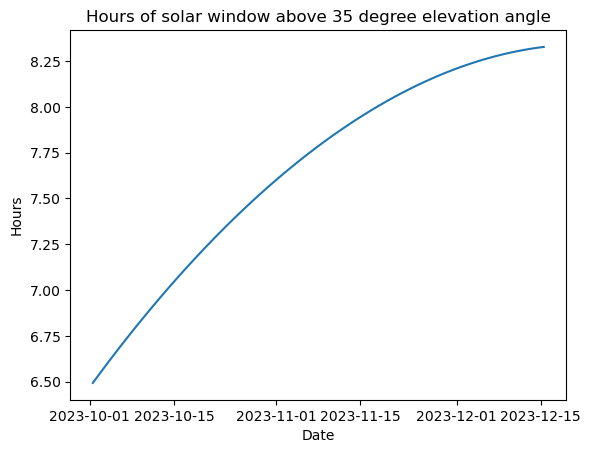

In [ ]:
plt.plot(dates, pd.TimedeltaIndex(sets-rises).total_seconds()/3600)
plt.xlabel('Date')
plt.ylabel('Hours')
plt.title('Hours of solar window above ' + str(solarcutoff) + ' degree elevation angle')

In [ ]:
# display the start, middle, and end of the solar window for each day

from IPython.display import display, HTML

frame = { 'Dates': dates.strftime('%Y%m%d'), 'Rising ' + str(solarcutoff): pd.DatetimeIndex(rises).strftime('%H:%M'), 'Noon': pd.DatetimeIndex(noons).strftime('%H:%M'),  'Setting ' + str(solarcutoff): pd.DatetimeIndex(sets).strftime('%H:%M') }
df = pd.DataFrame(frame)
display(HTML(df.to_html()))



,Dates,Rising 35,Noon,Setting 35
0,20231001,09:21,12:36,15:50
1,20231002,09:19,12:35,15:51
2,20231003,09:17,12:35,15:52
3,20231004,09:16,12:35,15:53
4,20231005,09:14,12:34,15:54
5,20231006,09:13,12:34,15:55
6,20231007,09:11,12:34,15:56
7,20231008,09:10,12:33,15:57
8,20231009,09:08,12:33,15:58
9,20231010,09:07,12:33,15:59


In [ ]:
# TODO: NEED TO REIMPLEMENT TERRAIN-AWARE SWATH SPACING IN FLIGHTBOX.PY
# THIS IS A VERY SIMPLIFIED STAND IN 

def flightbox1(instrument, lat0, lon0, azimuth, altitude, boxLength, boxWidth, overlap=20):

    swath = instrument.swathWidthAt(altitude)
    swath_spacing = swath * (1 - (overlap/100))

    nlines = int(np.ceil(boxWidth / swath_spacing))
 
    if (nlines % 2):
        right = np.arange(0.5, int(nlines/2))
    else:
        right = np.arange(0, int(nlines/2)+1)
    left = np.flip(-1.0 * right)
    dists_from_center = swath_spacing * np.unique(np.concatenate((left,right), axis=0))

    lines = []
    firstLine = Flightline.Flightline.startRangeAzimuth(lat0, lon0, boxLength, azimuth, altitude=altitude)

    for dist in dists_from_center:
        line = firstLine.copy().offsetAcross(dist)
        lines.append(line)  

    return(lines)



    


In [ ]:
# calculate the total flight time for a box of lines
# TODO: make in to more generalized routines and move this to flightplan.py

def seconds_to_hours(seconds):
    return (round(seconds/3600,1))

# define a flight box
lon = 19.75318179539759 # lat/lon are the starting point at one end of the center line of the box
lat = -34.39969883641197
azimuth = 90 # degrees from north
boxlength = 200000 # meters
boxwidth = 30000 # meters
overlap = 20.0 # percent swath overlap
altitude = 5000 # meters
oversampling = 2

lines = flightbox1(aviris, lat, lon, azimuth, altitude, boxlength, boxwidth, overlap=20)

# reset time counters to zero
scienceTime = 0
turnTime = 0

# loop over lines to calculate science time 
for line in lines:
    # set science velocity to the minimum of the aircraft cruise velocity and the critical ground speed
    # TODO: SHOULD THROW A WARNING HERE IF CRITICAL GROUND SPEED IS TOO LOW FOR AIRCRAFT
    LaRC_G3.ScienceVelocity = np.min([LaRC_G3.CruiseVelocity,aviris.criticalGroundSpeed(line.altitude, oversampling)])
    scienceTime = scienceTime + LaRC_G3.ScienceTime(line.length + 10000)  # add line time plus lead in time
    turnTime = turnTime + LaRC_G3.TurnTime  # add turning time


# TODO: should find closest entry point
# if even number of lines use same side for exit point
# if odd number of lines use the opposite side for exit

transitDistance, _ = pymap3d.vincenty.vdist(airport.latitude, airport.longitude, lines[0].lat1, lines[0].lon1)
transitTime = LaRC_G3.CruiseTime(transitDistance * 2)

takeoffAndLandingTime = 30 * 60

totalTime = (scienceTime + turnTime + transitTime + takeoffAndLandingTime)


print("Number of Lines: " + str(len(lines)))
print("Science Hours: " + str(seconds_to_hours(scienceTime)))
print("Turning Hours: " + str(seconds_to_hours(turnTime)))
print("Transit Hours: " + str(seconds_to_hours(transitTime)))
print("Total Hours: " + str(seconds_to_hours(totalTime)))



Number of Lines: 10
Science Hours: 2.6
Turning Hours: 1.7
Transit Hours: 0.3
Total Hours: 5.1


In [ ]:
# TODO: create a KML of linestrings showing the path from the airport to the box, the lines and turns, and the return to the airport

In [ ]:
import simplekml

# create a kml file showing the swath polygons for a set of lines
kml = simplekml.Kml(open=1)

fol = kml.newfolder(name='AVIRIS_swathes')
for n in range(len(lines)):
    polygon_name = "AVIRIS_swath" + str(n+1).zfill(3)
    pol = fol.newpolygon(name=polygon_name)

    poly = lines[n].swathPolygon(aviris)
    pol.outerboundaryis = list(zip(poly.exterior.coords.xy[0],
                                    poly.exterior.coords.xy[1]))

    pol.style.linestyle.color = simplekml.Color.white
    pol.style.linestyle.width = 1
    pol.style.polystyle.color = simplekml.Color.changealphaint(
        128, simplekml.Color.red)

kml.save("test.kml")

0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0yn05l6jh_qcfn_6m7w0000gq/T/tmpyvm0vdn1/temp_dem
0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0yn05l6jh_qcfn_6m7w0000gq/T/tmpb8tzsjt4/temp_dem
0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0yn05l6jh_qcfn_6m7w0000gq/T/tmpzg0f5syr/temp_dem
0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0yn05l6jh_qcfn_6m7w0000gq/T/tmpm_ecn13k/temp_dem
0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0yn05l6jh_qcfn_6m7w0000gq/T/tmpdbs1o4_6/temp_dem
0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0yn05l6jh_qcfn_6m7w0000gq/T/tmpdtgbjgk3/temp_dem
0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0yn05l6jh_qcfn_6m7w0000gq/T/tmp1kqyxv4p/temp_dem
0...10...20...30...40...50...60...70...80...90...100 - done.
/var/folders/jp/yzyqx0